## Data Preprocessing

Getting the Data ready for a Machine learning algorithm
- Reading Data
- Missing Data
- Deal with Categorical data
- Splitting Data
- Normalize Data

In [48]:
import pandas as pd
import numpy as np

datapath = r'C:\Users\Upend\Anaconda3\MyScripts\Data.csv'
data_df = pd.read_csv(datapath)
print(data_df)

      City   Age     Sex Smoke  HappinessIndex Healthy
0   Mumbai  24.0    Male   Yes           241.0     Yes
1   London  80.0  Female    No           928.0      No
2  NewYork  38.0    Male   Yes             NaN     Yes
3  NewYork  22.0  Female   Yes           786.0     Yes
4  NewYork  36.0    Male   Yes           967.0     Yes
5   London   NaN  Female   Yes           665.0     Yes
6   Mumbai  17.0  Female    No           293.0      No
7  NewYork  28.0  Female    No           494.0     Yes
8   Mumbai  45.0  Female    No           707.0      No
9   London  29.0    Male   Yes           599.0      No


In [61]:
X=data_df.iloc[:,0:5]
y=data_df.iloc[:,5]
print(X)
print(y)

      City   Age     Sex Smoke  HappinessIndex
0   Mumbai  24.0    Male   Yes           241.0
1   London  80.0  Female    No           928.0
2  NewYork  38.0    Male   Yes             NaN
3  NewYork  22.0  Female   Yes           786.0
4  NewYork  36.0    Male   Yes           967.0
5   London   NaN  Female   Yes           665.0
6   Mumbai  17.0  Female    No           293.0
7  NewYork  28.0  Female    No           494.0
8   Mumbai  45.0  Female    No           707.0
9   London  29.0    Male   Yes           599.0
0    Yes
1     No
2    Yes
3    Yes
4    Yes
5    Yes
6     No
7    Yes
8     No
9     No
Name: Healthy, dtype: object


In [62]:
# Filling Missing Data
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
#X[:,1:2]=imputer.fit_transform(X[:,1:2])
#X[:,4:5]=imputer.fit_transform(X[:,4:5])

X.iloc[:,1:2]=imputer.fit_transform(X.iloc[:,1:2])
X.iloc[:,4:5]=imputer.fit_transform(X.iloc[:,4:5])
print(X)

      City        Age     Sex Smoke  HappinessIndex
0   Mumbai  24.000000    Male   Yes      241.000000
1   London  80.000000  Female    No      928.000000
2  NewYork  38.000000    Male   Yes      631.111111
3  NewYork  22.000000  Female   Yes      786.000000
4  NewYork  36.000000    Male   Yes      967.000000
5   London  35.444444  Female   Yes      665.000000
6   Mumbai  17.000000  Female    No      293.000000
7  NewYork  28.000000  Female    No      494.000000
8   Mumbai  45.000000  Female    No      707.000000
9   London  29.000000    Male   Yes      599.000000


In [63]:
#Categorical Data
#- Converting Non numeric data to Numeric
#    - Encoding Yes/No to 1/0
#    - Encoding categories to flag level

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

X.iloc[:,2:3] = LabelEncoder().fit_transform(X.iloc[:,2:3])
X['Smoke'] = LabelEncoder().fit_transform(X['Smoke'])
X['City'] = LabelEncoder().fit_transform(X['City'])
y = LabelEncoder().fit_transform(y)
print(X)
print(y)

   City        Age  Sex  Smoke  HappinessIndex
0     1  24.000000    1      1      241.000000
1     0  80.000000    0      0      928.000000
2     2  38.000000    1      1      631.111111
3     2  22.000000    0      1      786.000000
4     2  36.000000    1      1      967.000000
5     0  35.444444    0      1      665.000000
6     1  17.000000    0      0      293.000000
7     2  28.000000    0      0      494.000000
8     1  45.000000    0      0      707.000000
9     0  29.000000    1      1      599.000000
[1 0 1 1 1 1 0 1 0 0]


C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
X = OneHotEncoder(categorical_features=[0]).fit_transform(X).toarray()
print(X)

[[  0.           1.           0.          24.           1.
    1.         241.        ]
 [  1.           0.           0.          80.           0.
    0.         928.        ]
 [  0.           0.           1.          38.           1.
    1.         631.11111111]
 [  0.           0.           1.          22.           0.
    1.         786.        ]
 [  0.           0.           1.          36.           1.
    1.         967.        ]
 [  1.           0.           0.          35.44444444   0.
    1.         665.        ]
 [  0.           1.           0.          17.           0.
    0.         293.        ]
 [  0.           0.           1.          28.           0.
    0.         494.        ]
 [  0.           1.           0.          45.           0.
    0.         707.        ]
 [  1.           0.           0.          29.           1.
    1.         599.        ]]


C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [66]:
#Splitting Data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)


In [73]:
#Normalizating Data
# - ucladian distance is used by machine learning

from sklearn.preprocessing import StandardScaler

#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

print(X_train)
print(X_test)

[[ 1.15470054 -0.63245553 -0.63245553  0.03409783 -0.8660254   0.63245553
   0.09473141]
 [-0.8660254  -0.63245553  1.58113883 -0.65354172 -0.8660254   0.63245553
   0.55062633]
 [ 1.15470054 -0.63245553 -0.63245553  2.3129694  -0.8660254  -1.58113883
   1.0856435 ]
 [ 1.15470054 -0.63245553 -0.63245553 -0.29551452  1.15470054  0.63245553
  -0.15393854]
 [-0.8660254  -0.63245553  1.58113883  0.06251269  1.15470054  0.63245553
   1.23258484]
 [-0.8660254   1.58113883 -0.63245553 -0.90927544 -0.8660254  -1.58113883
  -1.30686288]
 [-0.8660254   1.58113883 -0.63245553 -0.55124824  1.15470054  0.63245553
  -1.50278466]]
[[ 6.34413157e-17  1.41421356e+00 -1.41421356e+00  1.14676436e+00
  -7.07106781e-01 -7.07106781e-01  1.09246263e+00]
 [ 6.34413157e-17 -7.07106781e-01  7.07106781e-01  1.43345545e-01
   1.41421356e+00  1.41421356e+00  2.31518041e-01]
 [ 6.34413157e-17 -7.07106781e-01  7.07106781e-01 -1.29010990e+00
  -7.07106781e-01 -7.07106781e-01 -1.32398067e+00]]


 ## Data Analysis

In [76]:
import pandas as pd

diabet_path = r'C:\Users\Upend\Anaconda3\MyScripts\diabetes.csv'
diabet_data = pd.read_csv(diabet_path)

diabet_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
X = diabet_data.iloc[:,0:8]
y = diabet_data['Outcome']

X.head()
y.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [81]:
diabet_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [82]:
diabet_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
corr = diabet_data.corr()

In [87]:
corr[corr > 0.4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.466581
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000000,0.436783,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,0.436783,1.000000,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.466581,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [88]:
y.groupby(y).size()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

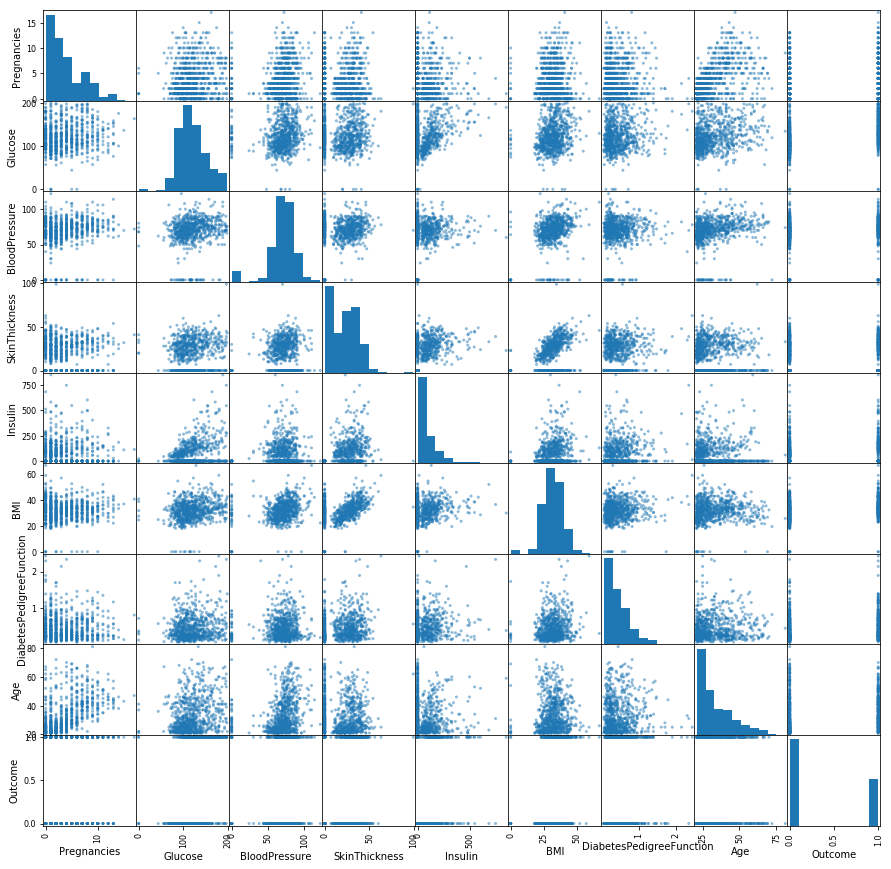

In [92]:
import seaborn as sns
from pandas.plotting import scatter_matrix

scatter_matrix(diabet_data,figsize=(15,15));

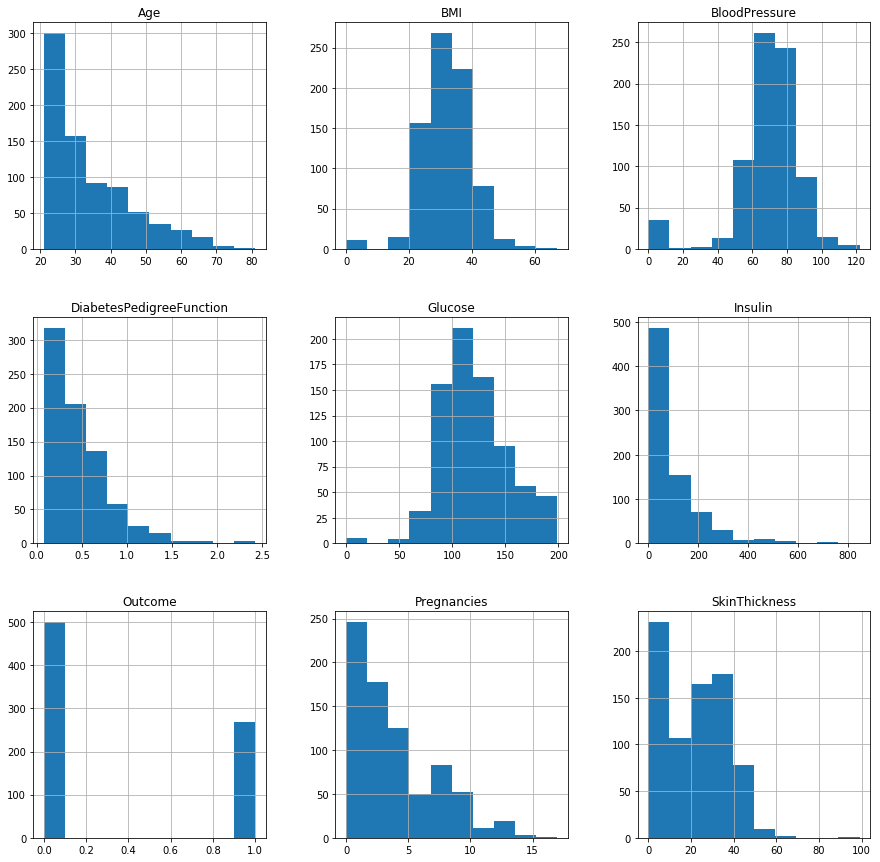

In [95]:
diabet_data.hist(figsize=(15,15));

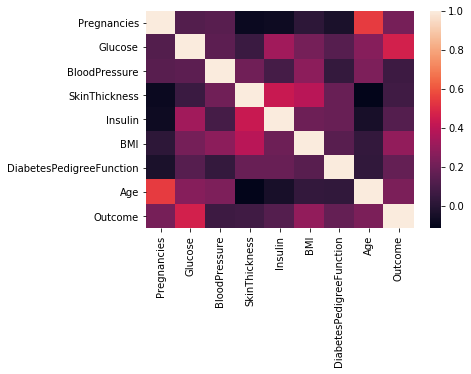

In [96]:
sns.heatmap(corr)

## Data Transformation
- Scaling Data
- Standardization Data
- Normalization Data
- Binarize Data

In [98]:
data = diabet_data.values

In [99]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [100]:
X = data[:,0:8]
y = data[:,8]

Scaling Data

 - X_std = (X - X.min)/(X.max - X.min)
 - X_scaled = X_std * (X.max - X.min) + X.min

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_mmscaler = scaler.fit_transform(X)
#y_scaler = scaler.transform(y)

X_mmscaler

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

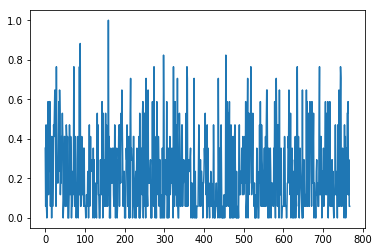

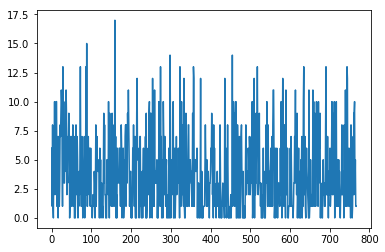

In [118]:
import matplotlib.pyplot as plt
plt.plot(X_mmscaler[:,0])
plt.figure()
plt.plot(X[:,0])

Standardization Data

- Bring the data into Gaussian Normal Distribution
- Mean is Zero and std will be one

In [119]:
from sklearn.preprocessing import StandardScaler


print(X)
print(X[:,0].mean())
print(X[:,0].std())

scaler = StandardScaler()

X_sscaler = scaler.fit_transform(X)

print(X_sscaler)
print(X_sscaler[:,0].mean())
print(X_sscaler[:,0].std())


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
3.8450520833333335
3.3673836124089958
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
-6.47630097698008e-17
1.0


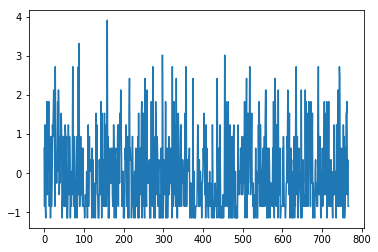

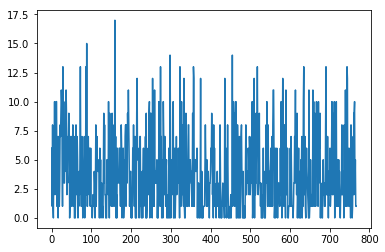

In [120]:
import matplotlib.pyplot as plt
plt.plot(X_sscaler[:,0])
plt.figure()
plt.plot(X[:,0])

Normalizating Data
- Normalizing the data across the row
- sqrt(sum(sqar(X_row))) = 1

In [124]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

X_norm = norm.fit_transform(X)
X_norm

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

Binarize Data
- convert the data into Binary format over a specific threshold value

In [127]:
from sklearn.preprocessing import Binarizer

binar = Binarizer(threshold=5)

X_bin = binar.fit_transform(X)
X_bin

array([[1., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.]])

Parametric ML - based on a specific pattern - Linear Regression
Non Parametric ML - determines patter based on the feature - Decision Tree

## Feature Selection

Techniques of Feature Selection
- SelectKBest - univariate
- Recursive Feature Elimination
- PCA
- Variance Threshold
- Tree based

In [131]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

Univatiate Feature Selection Method
 - selects first best K features based on a specified function
 - function will determine the best feature

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selectkbest = SelectKBest(score_func = f_regression, k =3)

select = selectkbest.fit(X,y)

In [137]:
select.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [138]:
select.transform(X)

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       ...,
       [121. ,  26.2,  30. ],
       [126. ,  30.1,  47. ],
       [ 93. ,  30.4,  23. ]])

Recursive Feature Elimiation 

- Eliminates the features rather than selection
- uses the ML models to calculates the score
- it starts with all the features and removes each feature in a recursive manner 
- checks if the score is 
    increased - remove the feature
    decreased - include the feature and remove any other feature and continue


In [145]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression(),n_features_to_select=3)
rfe.fit(X,y)

C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=3, step=1, verbose=0)

In [146]:
rfe.ranking_

array([1, 2, 3, 5, 6, 1, 1, 4])

In [147]:
rfe.transform(X)

array([[ 6.   , 33.6  ,  0.627],
       [ 1.   , 26.6  ,  0.351],
       [ 8.   , 23.3  ,  0.672],
       ...,
       [ 5.   , 26.2  ,  0.245],
       [ 1.   , 30.1  ,  0.349],
       [ 1.   , 30.4  ,  0.315]])

PCA  - Principle Component Analysis
- Feature Transformation/Feature Decomposition
- used to reduce the dimensions based on the n_component parameter
- outs a Vector for each record
- Maximum variance

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [157]:
pca.components_

array([[-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,
         6.07566861e-02,  9.93110844e-01,  1.40108085e-02,
         5.37167919e-04, -3.56474430e-03],
       [-2.26488861e-02, -9.72210040e-01, -1.41909330e-01,
         5.78614699e-02,  9.46266913e-02, -4.69729766e-02,
        -8.16804621e-04, -1.40168181e-01],
       [-2.24649003e-02,  1.43428710e-01, -9.22467192e-01,
        -3.07013055e-01,  2.09773019e-02, -1.32444542e-01,
        -6.39983017e-04, -1.25454310e-01],
       [-4.90459604e-02,  1.19830016e-01, -2.62742788e-01,
         8.84369380e-01, -6.55503615e-02,  1.92801728e-01,
         2.69908637e-03, -3.01024330e-01],
       [ 1.51612874e-01, -8.79407680e-02, -2.32165009e-01,
         2.59973487e-01, -1.72312241e-04,  2.14744823e-02,
         1.64080684e-03,  9.20504903e-01],
       [-5.04730888e-03,  5.07391813e-02,  7.56365525e-02,
         2.21363068e-01, -6.13326472e-03, -9.70776708e-01,
        -2.02903702e-03, -1.51133239e-02],
       [ 9.86672995e-01,  8.834261

In [158]:
pca.explained_variance_

array([1.34565730e+04, 9.32760132e+02, 3.90577831e+02, 1.98182691e+02,
       1.12689115e+02, 4.58294431e+01, 7.76070899e+00])

In [159]:
pca.transform(X)

array([[-75.71465491, -35.95078264,  -7.26078895, ...,  16.50654126,
          3.46044187,  -0.70204701],
       [-82.3582676 ,  28.90821322,  -5.49667139, ...,   3.481527  ,
          5.59026239,  -2.57201489],
       [-74.63064344, -67.90649647,  19.46180812, ..., -10.30011346,
          7.1443674 ,   4.279067  ],
       ...,
       [ 32.11319827,   3.3766648 ,  -1.58786446, ...,  -2.97928772,
          6.23903802,   1.72506482],
       [-80.21449431, -14.18601977,  12.3512639 , ...,   8.53295029,
         -2.84230707,  -5.12792839],
       [-81.30814972,  21.62149606,  -8.15276833, ...,  -4.91320746,
          3.17347633,  -1.28032403]])

Variance Threshold
- calculates the variance for each feature
- validates against the threshold and removed the features below it
- need to standardize the data

In [162]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 200)
vtfit = vt.fit(X,y)

In [163]:
vtfit.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [168]:
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X_mmscaler,y)

VarianceThreshold(threshold=0.01)

In [169]:
vtfit.variances_

array([0.03923624, 0.02578009, 0.02513837, 0.0259302 , 0.01853233,
       0.01378796, 0.01998841, 0.03836749])

Tree Based
- uses RandomForestClassifier or ExtraTreeClassifier models to check for the feature importance

In [171]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X,y)

C:\Users\Upend\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [173]:
rfc.feature_importances_

array([0.08984922, 0.2157133 , 0.09177604, 0.06131266, 0.07962484,
       0.20344341, 0.11773373, 0.1405468 ])